# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Analyis
Observed Trends
1.  
2.  
3.  

In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [65]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [66]:
# Creating base url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# Creating empty list and defining counter
city_list = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
city_counter = 0
set_counter = 1

# Print initial string
print("Beginning Data Retrieval ")
print("-----------------------------")

# Looping through each city to get data and then appending the data to the empty lists above..
for index, city in enumerate(cities, start = 1):
    try:
        # JSON
        response = requests.get(query_url + city).json()
        
        # Append
        city_list.append(response["name"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
        if city_counter > 49:
            city_counter = 0
            set_counter = set_counter + 1
    
        else:
            city_counter = city_counter + 1
            
        print(f"Processing Record {city_counter} of Set {set_counter} | {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
City not found. Skipping...
City not found. Skipping...
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | ihosy
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | saint-philippe
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | upernavik
Processing Record 7 of Set 1 | mar del plata
Processing Record 8 of Set 1 | xining
City not found. Skipping...
Processing Record 9 of Set 1 | ostrovnoy
Processing Record 10 of Set 1 | victoria
Processing Record 11 of Set 1 | ucluelet
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | kyra
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | erzin
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | magadi
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 19 of Set 1 | alyangula
Processin

Processing Record 37 of Set 4 | pleasanton
Processing Record 38 of Set 4 | princeton
Processing Record 39 of Set 4 | gazanjyk
Processing Record 40 of Set 4 | samarai
Processing Record 41 of Set 4 | tiksi
Processing Record 42 of Set 4 | arcata
Processing Record 43 of Set 4 | shimabara
City not found. Skipping...
Processing Record 44 of Set 4 | ambulu
Processing Record 45 of Set 4 | bloomsburg
Processing Record 46 of Set 4 | dikson
Processing Record 47 of Set 4 | monywa
Processing Record 48 of Set 4 | caravelas
Processing Record 49 of Set 4 | borzya
Processing Record 50 of Set 4 | ostersund
Processing Record 0 of Set 5 | safaga
Processing Record 1 of Set 5 | porlamar
Processing Record 2 of Set 5 | timiryazevskiy
Processing Record 3 of Set 5 | halvad
Processing Record 4 of Set 5 | portland
Processing Record 5 of Set 5 | balykshi
Processing Record 6 of Set 5 | isangel
Processing Record 7 of Set 5 | omboue
Processing Record 8 of Set 5 | araceli
City not found. Skipping...
Processing Record 

Processing Record 24 of Set 8 | aklavik
Processing Record 25 of Set 8 | nemuro
Processing Record 26 of Set 8 | hualmay
Processing Record 27 of Set 8 | northam
Processing Record 28 of Set 8 | nueva gerona
Processing Record 29 of Set 8 | hohhot
City not found. Skipping...
Processing Record 30 of Set 8 | eregli
Processing Record 31 of Set 8 | lacey
Processing Record 32 of Set 8 | san pablo
Processing Record 33 of Set 8 | westport
Processing Record 34 of Set 8 | fasa
Processing Record 35 of Set 8 | taltal
Processing Record 36 of Set 8 | salinopolis
Processing Record 37 of Set 8 | sept-iles
Processing Record 38 of Set 8 | sao joao da barra
Processing Record 39 of Set 8 | vila velha
Processing Record 40 of Set 8 | aykhal
Processing Record 41 of Set 8 | hobyo
Processing Record 42 of Set 8 | pochutla
Processing Record 43 of Set 8 | ahipara
Processing Record 44 of Set 8 | zhanaozen
Processing Record 45 of Set 8 | esperance
Processing Record 46 of Set 8 | saint-pierre
Processing Record 47 of Set

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [67]:
# Creating a Pandas dataframe with the data above
city_df = pd.DataFrame({"City": city_list, "Lat": latitude, "Lng": longitude, "Max Temp": max_temp,
                          "Humidity": humidity, "Cloudiness": cloudiness, "Wind Speed": wind_speed,
                          "Country": country, "Date": date})
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,39.87,98,18,3.31,NZ,1649614655
1,Ihosy,-22.4000,46.1167,65.93,93,47,10.38,MG,1649614677
2,Ribeira Grande,38.5167,-28.7000,57.60,62,40,28.77,PT,1649614649
3,Saint-Philippe,-21.3585,55.7679,78.39,81,76,13.65,RE,1649614677
4,New Norfolk,-42.7826,147.0587,53.65,50,78,1.01,AU,1649614678
...,...,...,...,...,...,...,...,...,...
550,Kokstad,-30.5472,29.4241,49.80,97,100,4.65,ZA,1649614864
551,Nara,34.6851,135.8049,61.50,57,100,1.57,JP,1649614736
552,Waingapu,-9.6567,120.2641,76.21,80,22,5.41,ID,1649614865
553,Kholodnyy,62.7167,147.9500,-24.21,100,59,3.58,RU,1649614865


In [68]:
# Export City data into a .csv file
city_df.to_csv("city.csv", index = False, header = True)
city_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [ ]:
# Group By dataframe: count, mean, std, min, 25%, 50%, 75%, max


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [63]:
# Cities with Humidity over 100 %

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs in the output_data folder
* Below are examples of what you should get but your results will be different.

## Latitude vs. Temperature Plot

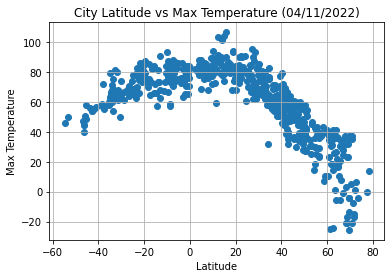

In [79]:
# Latitude vs Tempearture Plot
plt.scatter(latitude, max_temp)

plt.title("City Latitude vs Max Temperature (04/11/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid()

plt.savefig("City Latitude vs Max Temperature Plot")
plt.show()

## Latitude vs. Humidity Plot

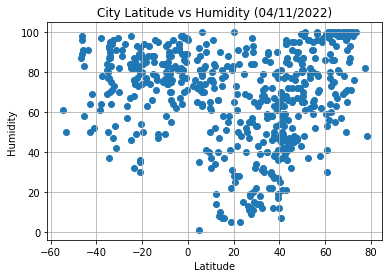

In [75]:
# Latitude vs Humidity Plot
plt.scatter(latitude, humidity)

plt.title("City Latitude vs Humidity (04/11/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

plt.savefig("City Latitude vs Humidity Plot")
plt.show()

## Latitude vs. Cloudiness Plot

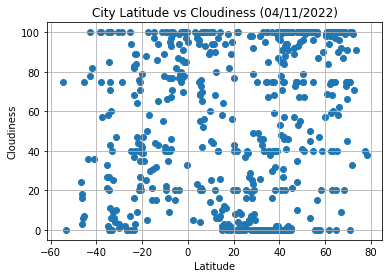

In [76]:
# Latitude vs Cloudiness Plot
plt.scatter(latitude, cloudiness)

plt.title("City Latitude vs Cloudiness (04/11/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

plt.savefig("City Latitude vs Cloudiness Plot")
plt.show()

## Latitude vs. Wind Speed Plot

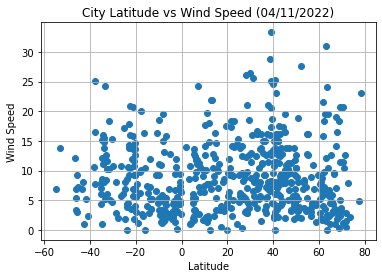

In [80]:
# Latitude vs Wind Speed Plot
plt.scatter(latitude, wind_speed)

plt.title("City Latitude vs Wind Speed (04/11/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

plt.savefig("City Latitude vs Wind Speed Plot")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression